In [11]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [49]:
def plotPerColumnDistribution(df):
    fig, axs = plt.subplots(1, 3, figsize=(24, 12))

    # Distribution of the "artist" column
    df['artist'].value_counts().head(70).plot(kind='bar', ax=axs[0])
    axs[0].set_title('Distribution of Artist')
    axs[0].set_xlabel('Artist')
    axs[0].set_ylabel('Count')

    # Distribution of the "date" column
    df['date'].value_counts().head(50).plot(kind='bar', ax=axs[1])
    axs[1].set_title('Distribution of Date')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Count')

    # Distribution of the "genre" column
    df['genre'].value_counts().head(20).plot(kind='bar', ax=axs[2])
    axs[2].set_title('Distribution of Genre')
    axs[2].set_xlabel('Genre')
    axs[2].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

In [42]:
def contar_in_train(df):
    # Comptar els valors True i False a la columna "in_train"
    counts = df['in_train'].value_counts()

    # Crear una gràfica de barres
    plt.bar(['True', 'False'], counts.values)

    # Afegir títol i etiquetes als eixos
    plt.title('Distribution of in_train Column')
    plt.xlabel('in_train Value')
    plt.ylabel('Count')

    # Mostrar la gràfica
    plt.show()

In [24]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    # Filtrar solo columnas numéricas
    numeric_cols = df.select_dtypes(include=['number']).columns
    df = df[numeric_cols]

    df = df.dropna() # Eliminar filas con valores faltantes
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [25]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna()
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [15]:
nRowsRead = None # specify 'None' if want to read whole file
# all_data_info.csv has 103250 rows in reality, but we are only loading/previewing the first 1000 rows

name_df = "all_data_info.csv"
df = pd.read_csv(name_df, delimiter=',', nrows = nRowsRead)
df.dataframeName = 'all_data_info.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
print(df.head(5))
print("\n")

There are 103250 rows and 12 columns
           artist    date     genre  pixelsx  pixelsy  size_bytes   source  \
0  Barnett Newman  1955.0  abstract  15530.0   6911.0   9201912.0  wikiart   
1  Barnett Newman  1950.0  abstract  14559.0   6866.0   8867532.0  wikiart   
2     kiri nichol  2013.0       NaN   9003.0   9004.0   1756681.0      NaN   
3     kiri nichol  2013.0       NaN   9003.0   9004.0   1942046.0      NaN   
4     kiri nichol  2013.0       NaN   9003.0   9004.0   1526212.0      NaN   

                  style                  title artist_group  in_train  \
0  Color Field Painting                  Uriel   train_only      True   
1  Color Field Painting  Vir Heroicus Sublimis   train_only      True   
2         Neoplasticism                    NaN    test_only     False   
3         Neoplasticism                    NaN    test_only     False   
4         Neoplasticism                    NaN    test_only     False   

  new_filename  
0   102257.jpg  
1    75232.jpg  
2   

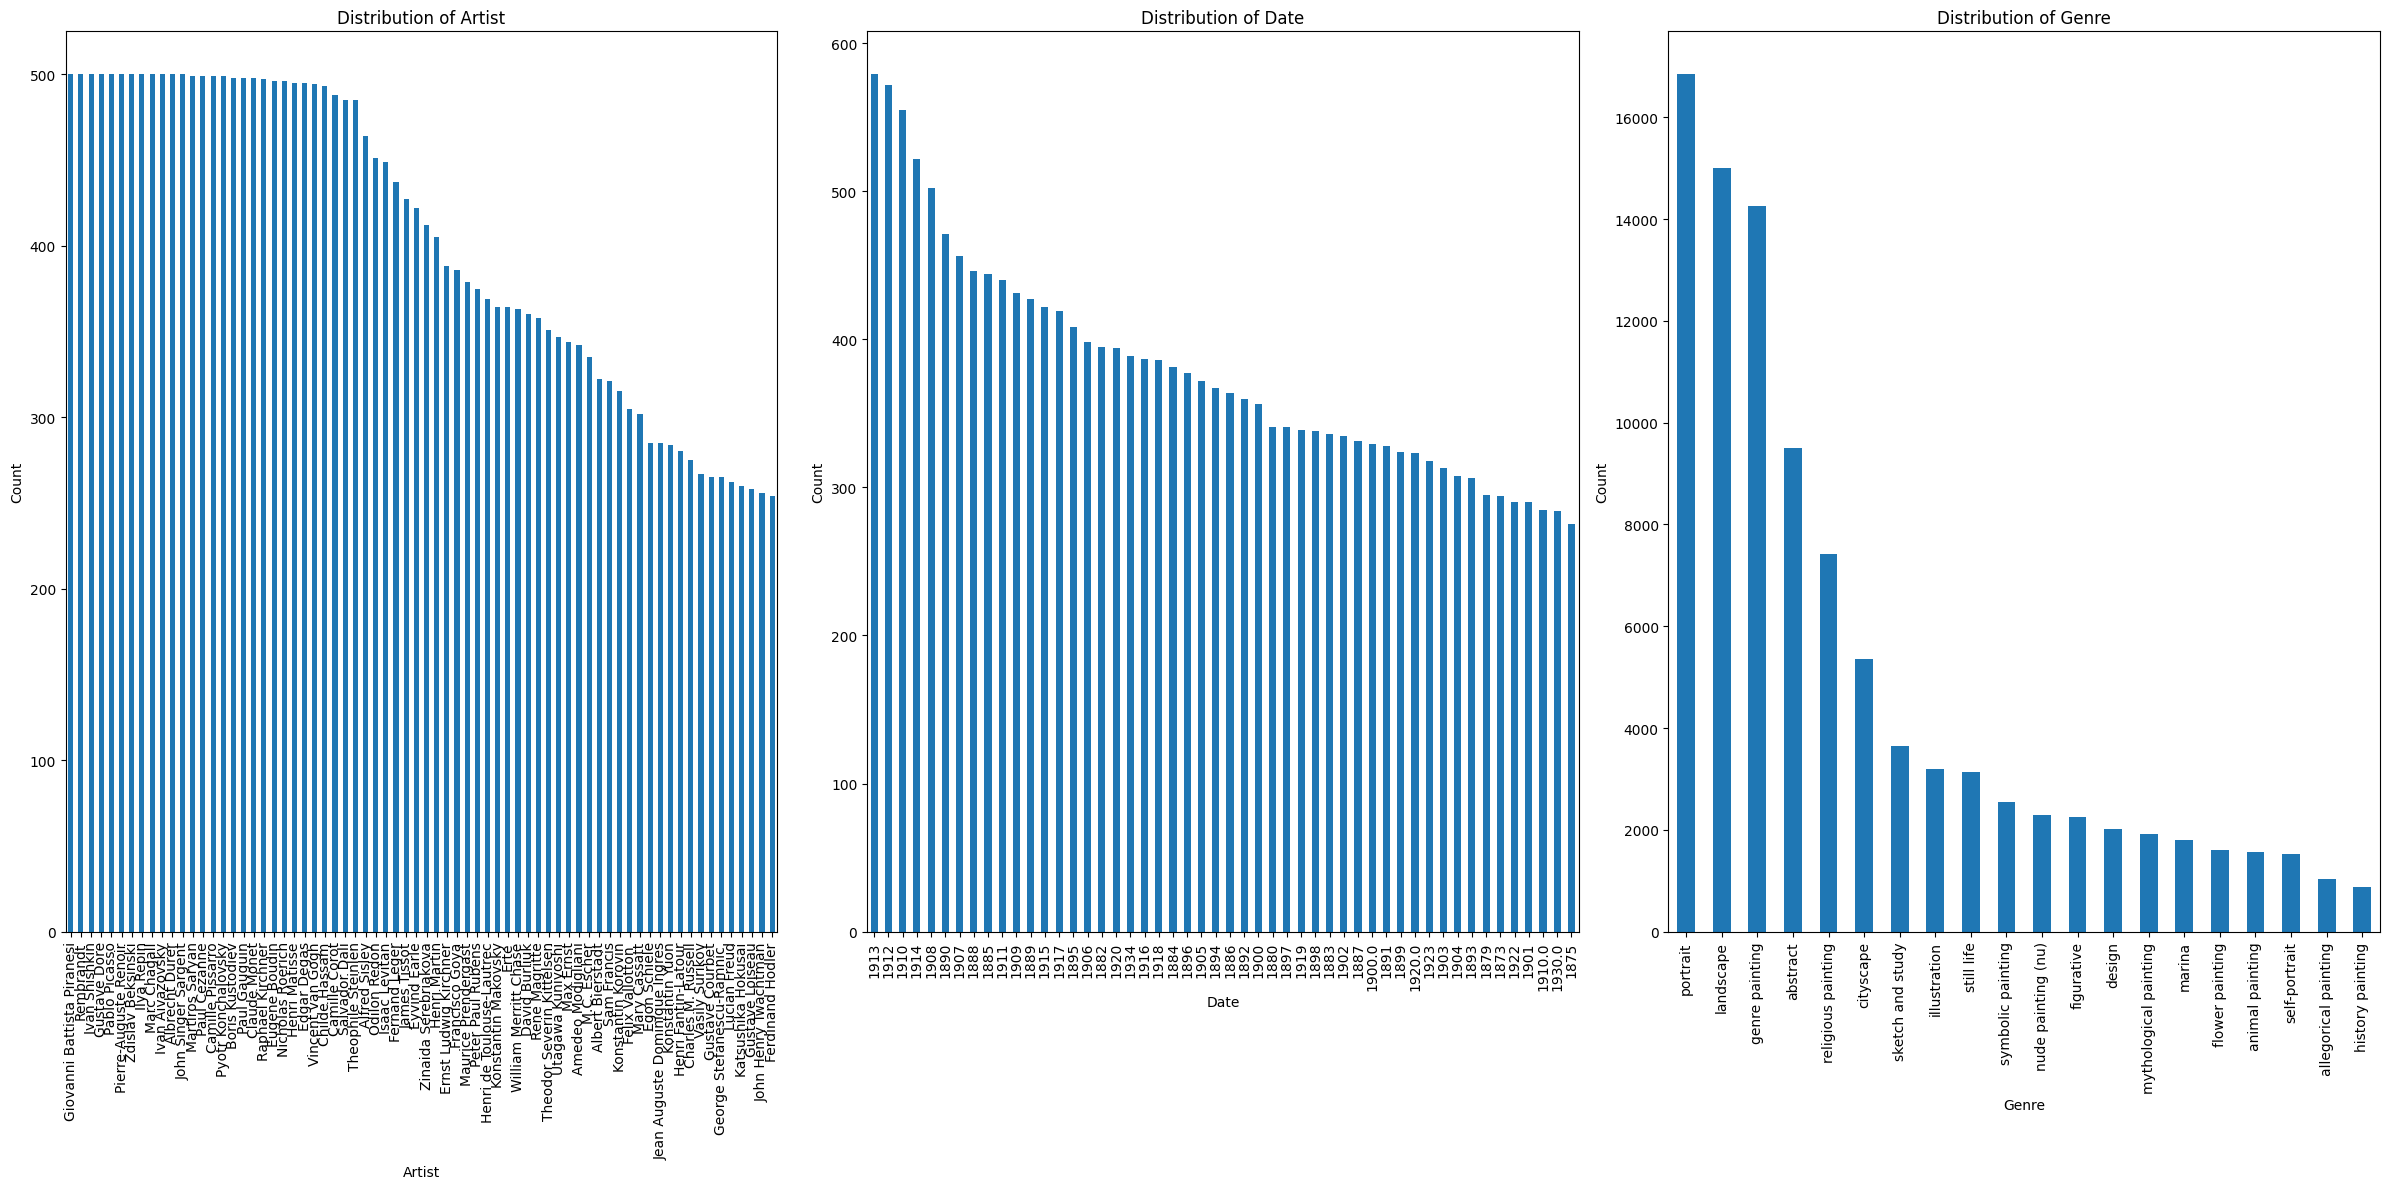

In [50]:
plotPerColumnDistribution(df)

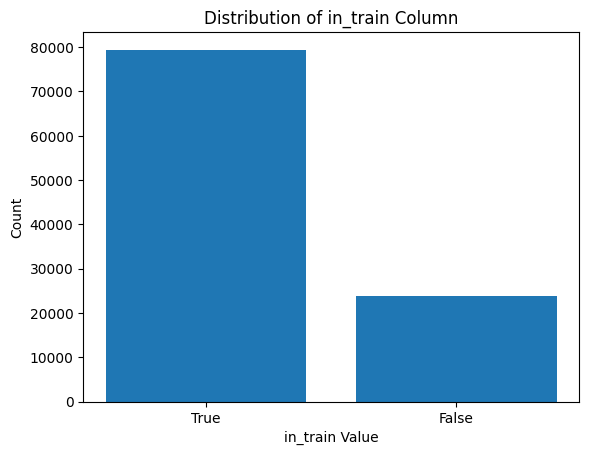

In [44]:
contar_in_train(df)

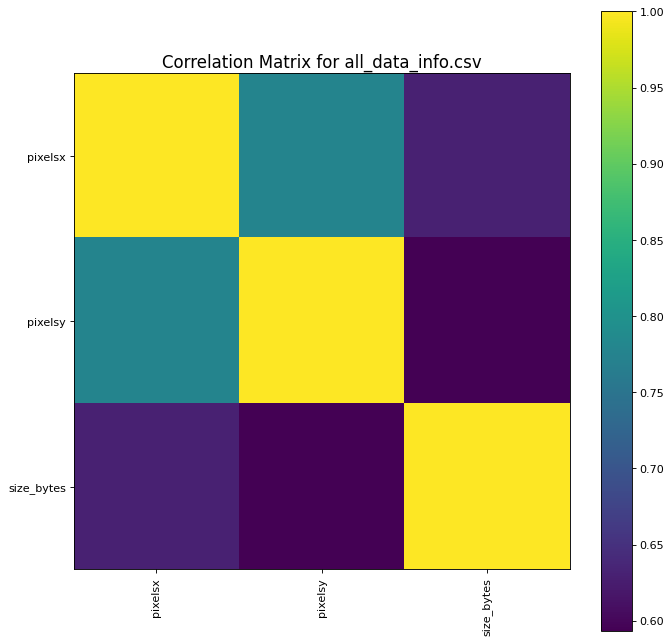

In [18]:
plotCorrelationMatrix(df, graphWidth=10)

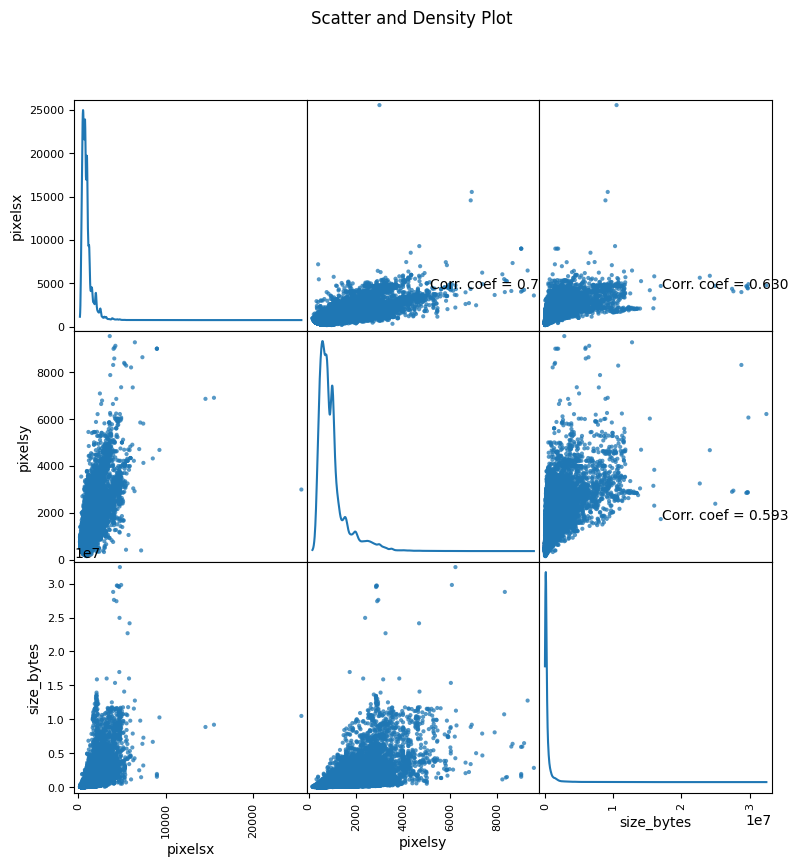

In [20]:
plotScatterMatrix(df, 9, 10)